This Plot shows the learning curve with respect to validation error on a network trained with best configuration found by hyperband

In [1]:
import sys
import os
from os.path import abspath, join as path_join
import numpy as np
import ConfigSpace as CS
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
PARENT_DIR =  path_join(os.getcwd(), "..", "..")
sys.path.insert(0, PARENT_DIR)


sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [10]:
print(__doc__)

def plot_learning_curve(train_accuracy, validation_accuracy):
    """
    Generate a simple plot of the test and training learning curve.

   
    """
    plt.figure()
    #plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

    plt.grid()

    plt.plot(train_accuracy, 'o-', color="r",
             label="Training Accuracy")
    plt.plot(validation_accuracy,  'o-', color="g",
             label="Validation Accuracy")

    plt.legend(loc="best")
    return plt



Automatically created module for IPython interactive environment


Learning Curve for Optimized Augmented data with longer training time = 100 Epochs

In [2]:
path = path_join(abspath("."), "..", "..", "AutoData/cifar10")
print(path)
#assert that path exists
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg


/home/misgana/AutoDA/notebooks/../../AutoData/cifar10


/home/misgana/AutoDA/notebooks/../../AutoData/cifar10/hyperband/AlexNet/best_config_hyperband_cifar10_AlexNet_2.json


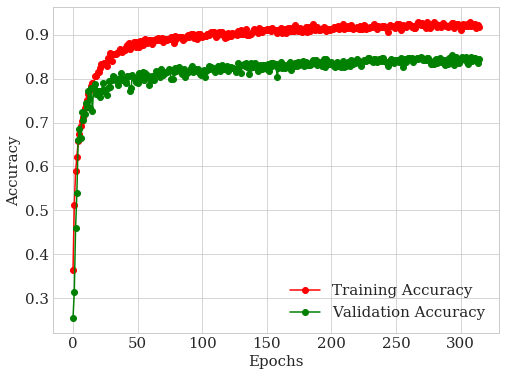

In [11]:

filename = path_join(path, ("hyperband/AlexNet/best_config_hyperband_cifar10_AlexNet_2.json"))#.format(r)))
print(filename)
with open(filename, "r") as f:
    res = json.load(f)
    #print(res["best_run_info"]["train_history"])
    train_accuracy = res["best_run_info"]["info"]["train_history"]["acc"]
    validation_accuracy = res["best_run_info"]["info"]["train_history"]["val_acc"]
    plot_learning_curve(train_accuracy, validation_accuracy)

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

    plt.grid()
    plt.show()


/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/hyperband/hyperband_result_7200.json
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/hyperband/hyperband_result.json


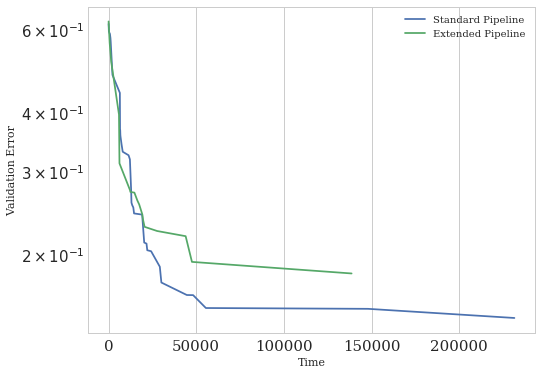

In [21]:

#filename = path_join(path, ("hyperband/hyperband_result_7200.json"))#.format(r)))
print(filename)
with open(filename, "r") as f:
    res = json.load(f)
    #print(res["best_run_info"]["train_history"])
    losses = res["best_config_trajectory"]["losses"]
    time = res["best_config_trajectory"]["time_finished"]
    
    #plot_learning_curve(losses)
    plt.plot(time, losses, label='Standard Pipeline')

    plt.xlabel("Time")
    plt.ylabel("Validation Error")
    plt.yscale('log')
    
    
filename = path_join(path, ("hyperband/hyperband_result.json"))
print(filename)
with open(filename, "r") as f:
    res = json.load(f)
    #print(res["best_run_info"]["train_history"])
    losses = res["best_config_trajectory"]["losses"]
    time = res["best_config_trajectory"]["time_finished"]
    
    #plot_learning_curve(losses)
    plt.plot(time, losses, label='Extended Pipeline')

    plt.xlabel("Time")
    plt.ylabel("Validation Error")
    plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()
    

/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/hyperband/hyperband_default_1800_1.json


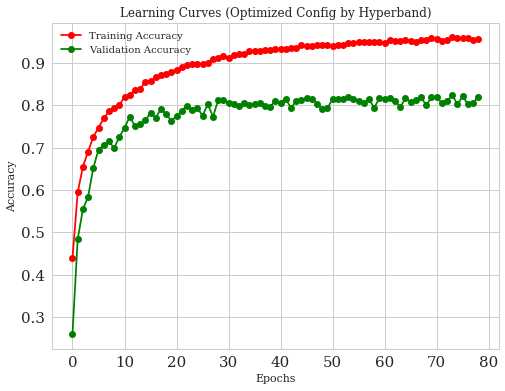

In [36]:
filename = path_join(path, ("hyperband_default_1800_{}.json".format(r)))
print(filename)
with open(filename, "r") as f:
    res = json.load(f)
    #print(res["best_run_info"]["train_history"])
    train_accuracy = res["best_run_info"]["train_history"]["acc"]
    validation_accuracy = res["best_run_info"]["train_history"]["val_acc"]
    plot_learning_curve(train_accuracy, validation_accuracy)

    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

    plt.grid()
    plt.show()

/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/default_augment/default_augment_cifar10_1.json


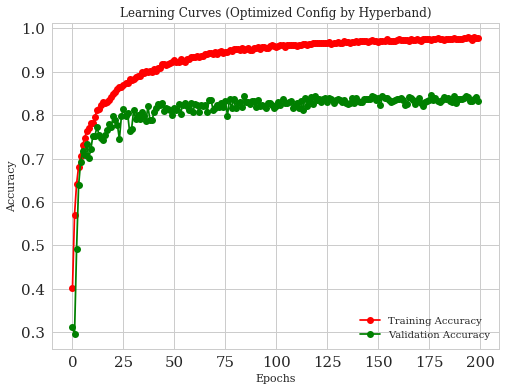

In [47]:
default=True
if default:
    filename = path_join(path, ("default_augment/default_augment_cifar10_{}.json".format(r)))
else:
    filename = path_join(path, ("no_augment/no_augment_cifar10_{}.json".format(r)))
print(filename)
with open(filename, "r") as f:
    res = json.load(f)
    #print(res["best_run_info"]["train_history"])
    train_accuracy = res["train_history"]["acc"]
    validation_accuracy = res["train_history"]["val_acc"]
    plot_learning_curve(train_accuracy, validation_accuracy)

    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

    plt.grid()
    plt.show()

/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/hyperband/hyperband_default_1800_1.json


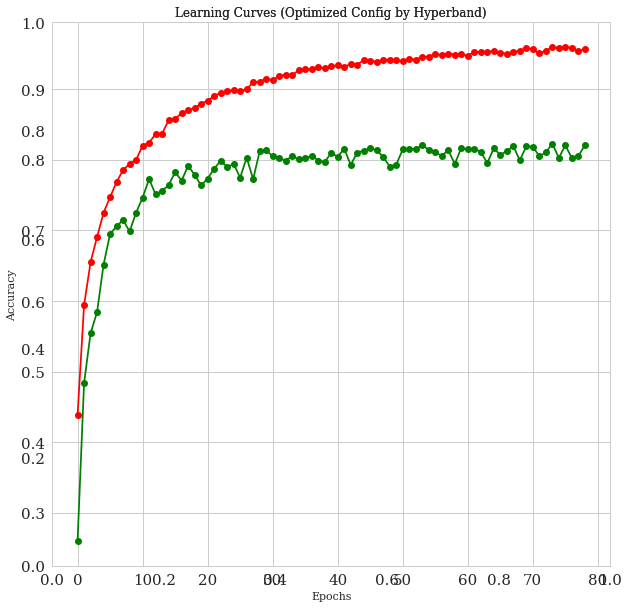

In [28]:
from itertools import product

n_rows, n_columns = 1, 1
fig, ax = plt.subplots(n_rows, n_columns,figsize=(10,10), squeeze=False)
i = 0
axes_iterator = iter(ax)

indices = product(range(n_rows), range(n_columns))

n_runs = 2
for r in range(1, n_runs):
    filename = path_join(path, ("hyperband_default_1800_{}.json".format(r)))
    print(filename)
    with open(filename, "r") as f:
        res = json.load(f)
        #print(res["best_run_info"]["train_history"])
        train_accuracy = res["best_run_info"]["train_history"]["acc"]
        validation_accuracy = res["best_run_info"]["train_history"]["val_acc"]
        
    row, column = next(indices)
    axis = ax[row][column]
    #plot_learning_curve(train_accuracy, validation_accuracy)
    axis.set_title(title)
    axis.plot(train_accuracy, 'o-', color="r",
             label="Training Accuracy")
    axis.plot(validation_accuracy,  'o-', color="g",
             label="Validation Accuracy")
fig.add_subplot(111, frameon=False)
plt.title(title)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.grid()
plt.show()
